Juan David Lasso Arias y Nestor Andres Tabares David

# Introducción

En el campo de la minería de datos y el aprendizaje automático, la clasificación de datos en la extracción de conocimientos útiles de grandes conjuntos de datos. Este proyecto se centra en la implementación de modelos predictivos binarios utilizando la biblioteca Scikit-learn, específicamente el algoritmo LogisticRegression, para analizar datos de admisión. El objetivo es evaluar la precisión y eficacia de los modelos predictivos a través de diversas métricas y comparaciones.

# Objetivos

* **Implementación del Modelo**: Utilizar la biblioteca Scikit-learn para aplicar el algoritmo LogisticRegression a los conjuntos de datos de ‘Binary predictor’ y ‘Admittance’, con el fin de desarrollar modelos predictivos binarios.
* **Matrices de Confusión**: Generar y analizar las matrices de confusión para cada modelo, proporcionando una visualización clara de la precisión de la clasificación y la tasa de error.
* **Evaluación del Rendimiento**: Calcular las métricas de rendimiento, incluyendo la precisión y la puntuación F1 para cada modelo predictivo.
* **Curvas ROC y AUC:** Construir y comparar las curvas Receiver Operating Characteristic (ROC) y calcular el área bajo la curva (AUC) para evaluar la capacidad discriminativa de los modelos.
* **Comparación de Modelos:** Realizar una comparación exhaustiva de los modelos desarrollados para determinar cuál es superior y por qué, basándose en las métricas de rendimiento y la robustez del modelo.
* **Análisis Descriptivo**: Llevar a cabo un análisis descriptivo detallado para ambas bases de datos, identificando patrones, tendencias y anomalías que puedan influir en la predicción y clasificación.

# Base de Datos de Binary Predictors

## Librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn import metrics
import seaborn as sns

## Carga de la base de datos

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/2.02. Binary predictors (1).csv'
data = pd.read_csv(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
 2   Gender    168 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


## Transformación de los datos cualitativos a cuantitativos

In [ ]:
data.loc[data['Admitted'] == 'Yes' , 'Admitted'] = 1
data.loc[data['Admitted'] == 'No', 'Admitted'] = 0
data.loc[data['Gender'] == 'Male' , 'Gender'] = 0
data.loc[data['Gender'] == 'Female', 'Gender'] = 1
data["Admitted"] = data["Admitted"].astype(int)
data["Gender"] = data["Gender"].astype(int)
data.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SAT       168 non-null    int64
 1   Admitted  168 non-null    int64
 2   Gender    168 non-null    int64
dtypes: int64(3)
memory usage: 4.1 KB


* **Estructura de Datos:** El DataFrame tiene 168 entradas y tres columnas: SAT, Admitted y Gender.

* **Tipo de Datos:** Todos los valores son enteros (int64) y no hay valores nulos.

## Filtrar variable respuesta con el resto de variables

In [ ]:
X = data[['SAT',"Gender"]]
y = data['Admitted']

## Histogramas de las variables cualitativas

<Axes: xlabel='Admitted', ylabel='count'>

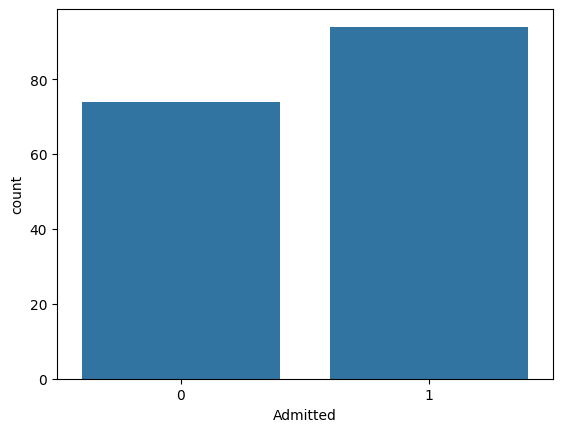

In [ ]:
sns.countplot(x=y, data=data)

In [1]:
clase_counts = data['Admitted'].value_counts()
plt.pie(clase_counts, labels=clase_counts.index, autopct='%1.1f%%',colors=["blue", "green", "orange"])
plt.title("Distribución de admisiones")
plt.axis("equal")
plt.show()

NameError: name 'data' is not defined

 * La grafica de barras como la de pastel indica una mayor cantidad de individuos admitidos en comparación con los no admitidos. Esto podría sugerir que el proceso de admisión es selectivo pero inclinado hacia un mayor número de admisiones.

<Axes: xlabel='Gender', ylabel='count'>

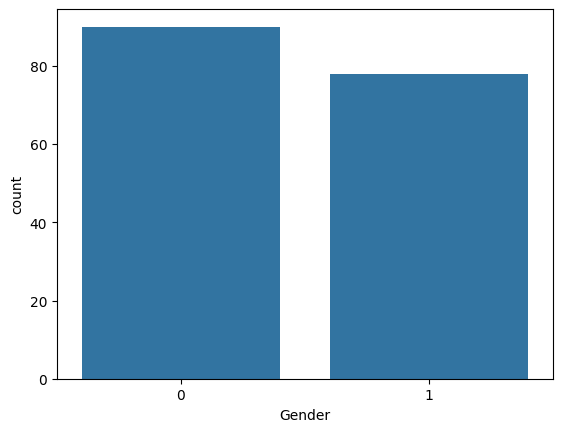

In [ ]:
sns.countplot(x="Gender", data=data)

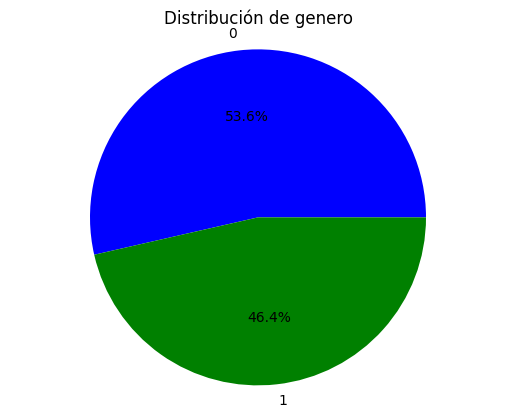

In [ ]:
clase_counts = data["Gender"].value_counts()
plt.pie(clase_counts, labels=clase_counts.index, autopct='%1.1f%%',colors=["blue", "green", "orange"])
plt.title("Distribución de genero")
plt.axis("equal")
plt.show()

* El gráfico de barras, muestra que hay una cantidad ligeramente mayor de individuos del género representado por el Hombre en comparación con el género representado por la Mujer.
* El gráfico circular, indica que el género representado por Hombre constituye el 53.6% del conjunto de datos, mientras que el género representado por la mujer constituye el 46.4%.
* La distribución relativamente equilibrada de género sugiere que cualquier análisis de la admisión basada en el género, no estaría sesgado hacia un género en particular.

## Grafico de densidad para la variable cuantitativa

Text(0, 0.5, 'Densidad')

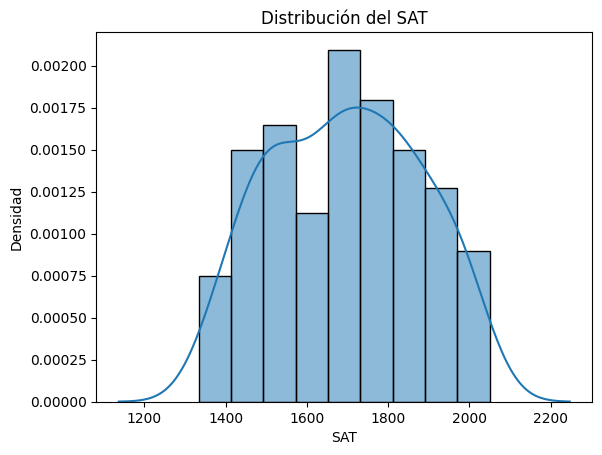

In [ ]:
sns.histplot(data['SAT'], kde=True, stat="density",kde_kws=dict(cut=3))
plt.title("Distribución del SAT")
plt.xlabel("SAT")
plt.ylabel("Densidad")

* La mayoría de los datos se agrupan alrededor del rango de 1600-1900 en la puntuación SAT, lo que indica que la mayoría de los estudiantes tienen puntuaciones dentro de este rango.

* La línea de densidad sugiere una distribución normal, lo que implica que las puntuaciones SAT están distribuidas de manera simétrica alrededor de la media.

## Histogramas del SAT por las Admisiones

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

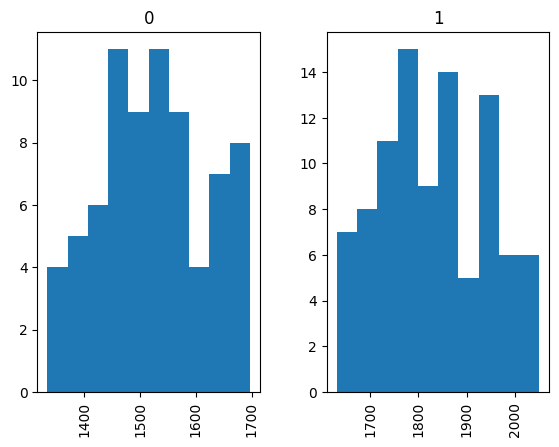

In [ ]:
data.hist(by="Admitted",column = "SAT")

*  Los individuos no admitidos tienden a tener puntajes SAT más bajos, con una concentración notable entre 1400 y 1600. Por otro lado, los admitidos muestran puntajes más altos, especialmente alrededor de 1800 a 1900.

* La frecuencia de individuos admitidos aumenta significativamente con puntajes SAT más altos, lo que sugiere que un puntaje SAT más alto mejora las posibilidades de admisión.

## Histogramas del SAT por el genero

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

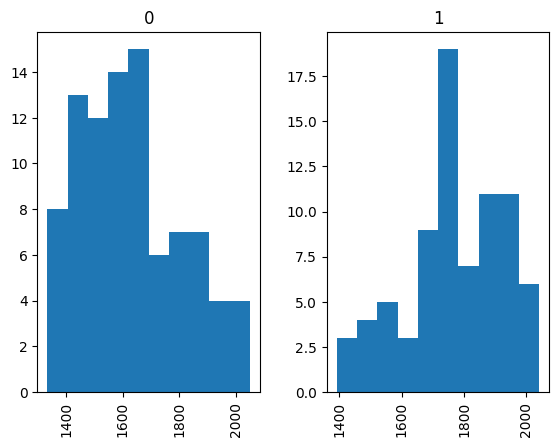

In [ ]:
data.hist(by="Gender",column = "SAT")

* Distribución de Puntajes SAT: El grupo etiquetado como Mujer muestra picos significativos en los puntajes SAT alrededor de 1400 y 2000, mientras que el grupo Hombre tiene una distribución más uniforme con un ligero aumento cerca de 1800.

## Tabla de la media de Admitted en comparación de las otras variables

In [ ]:
pd.pivot_table(data, index=y, columns= ["Gender"], aggfunc=np.mean)

SAT             
Gender              0            1
Admitted                          
0         1523.728814  1531.600000
1         1832.064516  1827.587302

* En Género Hombre en promedio los estudiantes no admitidos tiene 1523.73 de puntaje en el SAT  y Admitidos 1832.06 en el SAT
* En Género Mujer en promedio las estudiantes no admitidas tienen 1531.60 de puntaje y admitidas 1827.59 en el SAT

In [ ]:
def coef_vari(datos):
  desviacion_estandar = np.std(datos)
  media = np.mean(datos)
  coef_var = (desviacion_estandar / media) * 100
  return coef_var
piv = pd.pivot_table(data, index=y, columns= ["Gender"], aggfunc=(coef_vari))
piv

SAT          
Gender          0         1
Admitted                   
0         6.12281  5.974712
1         5.96115  6.025072

* Indica una variabilidad similar en las puntuaciones SAT. Esto sugiere que no hay una diferencia significativa en la dispersión de las puntuaciones entre los grupos de admisión y género.

## Box-plot de SAT por Admisiones

<Axes: xlabel='Admitted', ylabel='SAT'>

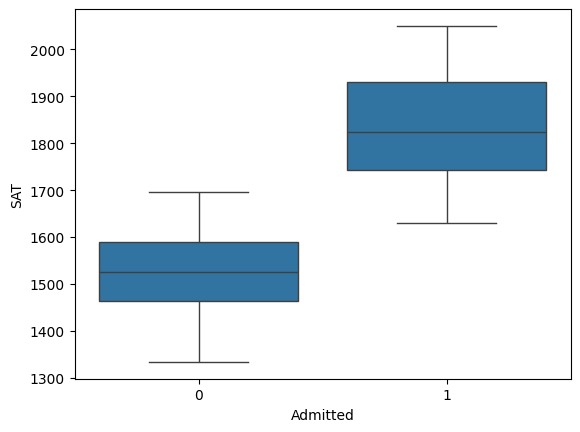

In [ ]:
sns.boxplot (x="Admitted", y="SAT", data=data)

* La mediana de las puntuaciones SAT de los individuos admitidos es mayor que la de los no admitidos.
* Existe una variación en las puntuaciones SAT dentro de ambos grupos, pero el rango es más amplio para los no admitidos.
* No hay valores atípicos en ninguno de los grupos.

## Box-plot del SAT por el genero

<Axes: xlabel='Gender', ylabel='SAT'>

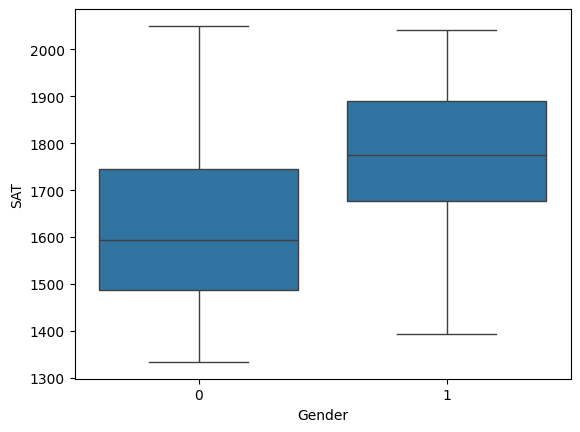

In [ ]:
sns.boxplot (x="Gender", y="SAT", data=data)

* La mediana de las puntuaciones SAT de las mujeres es significativamente mayor que la de los hombres.

## Correlación

In [ ]:
corr_mat = data[['Admitted', 'SAT', "Gender"]].corr()
corr_mat

,Admitted,SAT,Gender
Admitted,1.000000,0.826365,0.465374
SAT,0.826365,1.000000,0.384642
Gender,0.465374,0.384642,1.000000


Text(0.5, 1.0, 'Matriz de correlación')

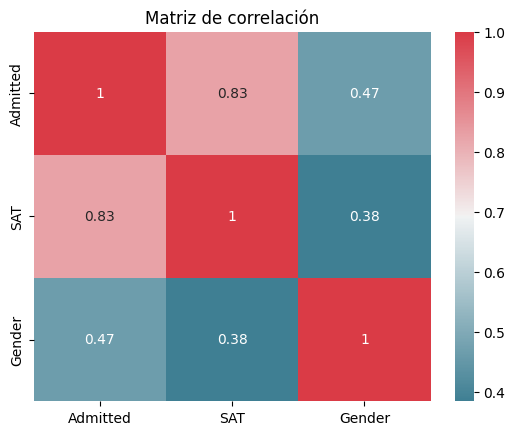

In [ ]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10,as_cmap=True),annot=True)
plt.title("Matriz de correlación")

* Existe una fuerte correlación positiva (0.83) entre ser admitido y los puntajes SAT.
* Puntuaciones SAT más altas están asociadas con una mayor probabilidad de ser admitido.
* La correlación entre el género y la admisión es moderada (0.47), lo que indica que el género tiene cierto impacto en las tasas de admisión
* La correlación entre el género y los puntajes SAT es más débil (0.38), sugiriendo que el género tiene menos influencia en el desempeño en los SAT


## Anova

In [ ]:
!pip install pingouin
from pingouin import pairwise_ttests
pairwise_results = pairwise_ttests(dv='SAT', between = ['Admitted'],padjust='bonf', data=data)
pairwise_results

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Admitted,0,1,False,True,-19.280657,165.056095,two-sided,3.997821e-44,3.94e+40,-2.924954


* Hay una diferencia significativa en las puntuaciones SAT entre los grupos admitidos y no admitidos.
* Los puntajes SAT más altos están asociados con una mayor probabilidad de ser admitidos.

## Entrenamiento de la Base de datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Estandarizar las caracteristicas de entrenamiento de los datos

In [ ]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## Combinación de Conjuntos de Datos para Evaluación General

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## Instancia del modelo de regresión logistica

In [ ]:
modelo = LogisticRegression()

## Ajuste del modelo de regresión logistica

In [ ]:
modelo.fit(X_combined_std, y_combined)

LogisticRegression()

## Matriz de confusión

In [ ]:
y_pred = modelo.predict(X_test_std)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[23  1]
 [ 1 26]]


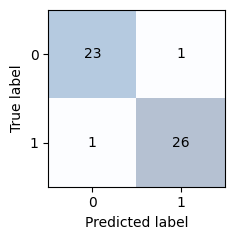

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()

* La mayoría de las predicciones se encuentran en la diagonal principal (23 y 26), lo que indica predicciones correctas.
* Hay dos instancias donde el modelo se equivocó, lo cual está representado por los números 1 fuera de la diagonal principal.

## Metricas de Rendimiento

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        24
           1       0.96      0.96      0.96        27

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51



* Ser o no ser adminitido tienen una precisión, recall y F1-score de 0.96.
* Esto indica un excelente rendimiento del clasificador en los datos de prueba.

In [ ]:
TPR = (confmat[0,[0]]/(confmat[0,[0]]+confmat[0,[1]]))
TPR

array([0.95833333])

In [ ]:
FPR = (confmat[1,[0]]/(confmat[1,[0]]+confmat[1,[1]]))
FPR

array([0.03703704])

In [ ]:
PRE = (confmat[0,[0]]/(confmat[1,[0]]+confmat[0,[0]]))
PRE

array([0.95833333])

In [ ]:
Recall = (confmat[0,[0]]/(confmat[0,[0]]+confmat[0,[1]]))
Recall

array([0.95833333])

In [ ]:
F1 = 2*(PRE*Recall/(PRE+Recall))
F1

array([0.95833333])

In [ ]:
MCC_arriba = (confmat[0,[0]]*confmat[0,[1]])-(confmat[1,[0]]*confmat[1,[1]])
MCC_abajo = np.sqrt((confmat[0,[0]]+confmat[1,[0]])*(confmat[0,[0]]+confmat[1,[1]])*(confmat[0,[1]]+confmat[1,[0]])*(confmat[0,[1]]+confmat[1,[1]]))
MCC = MCC_arriba/MCC_abajo
MCC

array([-0.01190476])

* TPR (Tasa de Verdaderos Positivos):
TPR = 0.95833333. Representa la proporción de verdaderos positivos con respecto a todas las instancias positivas reales.
* FPR (Tasa de Falsos Positivos):
FPR = 0.03703704 Representa la proporción de falsos positivos con respecto a todas las instancias negativas reales.
* PRE (Precisión):
PRE = 0.95833333 Representa la proporción de verdaderos positivos con respecto a todas las instancias clasificadas como positivas

* MCC (Coeficiente de relación de Matthews):
MCC= -0.0119. Sugiere que el modelo tiene un rendimiento muy cercano al de una clasificación aleatoria, lo que implica que no hay una correlación significativa entre las predicciones y las observaciones reales.

## AUC y ROC

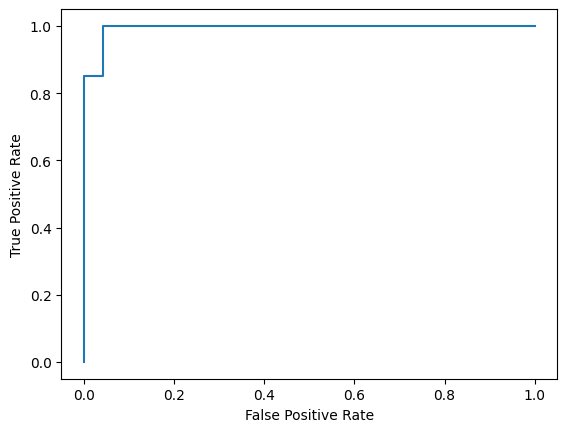

In [ ]:
y_pred_proba = modelo.predict_proba(X_test_std)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


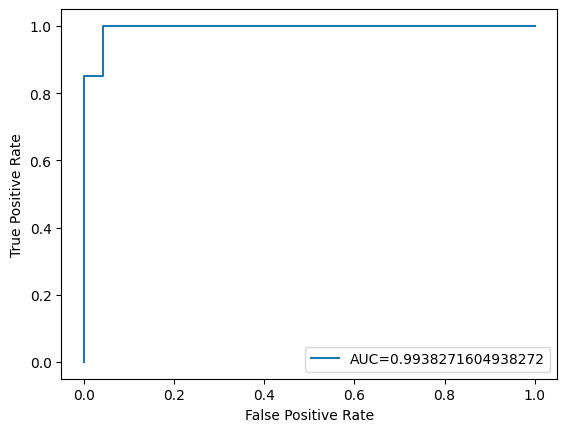

In [ ]:
y_pred_proba = modelo.predict_proba(X_test_std)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

* AUC (Área bajo la Curva):
El área bajo la curva ROC es aproximadamente 0.9938.
Un AUC cercano a 1 indica un excelente rendimiento del modelo en la capacidad de distinguir entre las clases positiva y negativa.
* TPR (Tasa de Verdaderos Positivos) y FPR (Tasa de Falsos Positivos):
La curva muestra cómo varía la tasa de verdaderos positivos (TPR) en función de la tasa de falsos positivos (FPR) a medida que se ajusta el umbral de clasificación.
* El modelo tiene un alto TPR (cerca de 1) y un bajo FPR (cerca de 0), lo que sugiere que es capaz de clasificar correctamente la mayoría de las instancias positivas mientras mantiene un bajo número de falsas alarmas.


# Base de datos de Admittance

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/2.01. Admittance (1).csv'
df = pd.read_csv(file_path)
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SAT       168 non-null    int64 
 1   Admitted  168 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [ ]:
df.loc[df['Admitted'] == 'Yes' , 'Admitted'] = 1
df.loc[df['Admitted'] == 'No', 'Admitted'] = 0
df["Admitted"] = df["Admitted"].astype(int)
df.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [ ]:
X1 = df[['SAT']]
y1 = df['Admitted']

In [ ]:
pd.pivot_table(df, index=y1, columns= [], aggfunc=np.mean)

,SAT
Admitted,
0,1525.324324
1,1829.063830


In [ ]:
piv1 = pd.pivot_table(df, index=y1, columns= [], aggfunc=(coef_vari))
piv1

,SAT
Admitted,
0,6.096379
1,6.005104


In [ ]:
corr_mat1 = df[['Admitted', 'SAT']].corr()
corr_mat1

,Admitted,SAT
Admitted,1.000000,0.826365
SAT,0.826365,1.000000


Text(0.5, 1.0, 'Matriz de correlación')

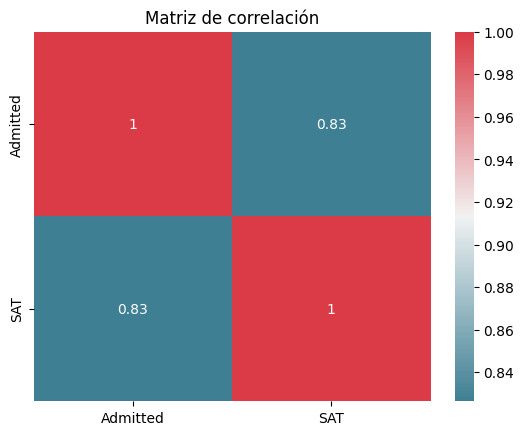

In [ ]:
sns.heatmap(corr_mat1,cmap=sns.diverging_palette(220, 10,as_cmap=True),annot=True)
plt.title("Matriz de correlación")


La correlación entre las variables "Admitted" (Admitido) y "SAT" (Puntaje SAT) es de 0.83. Esto indica una correlación positiva fuerte entre ambas variables.
Una correlación positiva fuerte sugiere que los estudiantes con puntajes más altos en el examen SAT tienen mayores probabilidades de ser admitidos en la institución educativa.

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [ ]:
sc_1 = StandardScaler()
sc_1.fit(X1_train)
X1_train_std = sc_1.transform(X1_train)
X1_test_std = sc_1.transform(X1_test)


In [ ]:
X1_combined_std = np.vstack((X1_train_std, X1_test_std))
y1_combined = np.hstack((y1_train, y1_test))

In [ ]:
modelo1 = LogisticRegression()

In [ ]:
modelo1.fit(X1_combined_std, y1_combined)

LogisticRegression()

In [ ]:
y1_pred = modelo1.predict(X1_test_std)
confmatrix = confusion_matrix(y_true=y1_test, y_pred=y1_pred)
print(confmatrix)

[[20  4]
 [ 2 25]]


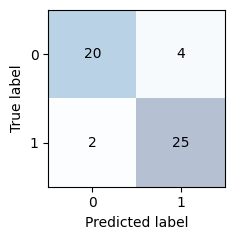

In [ ]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmatrix.shape[0]):
  for j in range(confmatrix.shape[1]):
    ax.text(x=j, y=i, s=confmatrix[i, j], va='center', ha='center')
ax.xaxis.set_ticks_position('bottom')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
#plt.savefig('figures/06_09.png', dpi=300)
plt.show()


* La mayoría de las predicciones se encuentran en la diagonal principal (20 y 25), lo que indica predicciones correctas.

* Hay seís instancias donde el modelo se equivocó, lo cual está representado por los números 4 y 2 fuera de la diagonal principal.

In [ ]:
print(classification_report(y_true=y1_test, y_pred=y1_pred))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        24
           1       0.86      0.93      0.89        27

    accuracy                           0.88        51
   macro avg       0.89      0.88      0.88        51
weighted avg       0.88      0.88      0.88        51



* **Precisión (precision):**

**No Admitido:** La precisión es de 0.91, lo que significa que el 91% de las predicciones como clase 0 fueron correctas.

**Admitido:** La precisión es de 0.86, lo que indica que el 86% de las predicciones como clase 1 fueron correctas.

* **Recall (sensibilidad):**

**No Admitido:** El recall es de 0.83, lo que significa que el modelo logró capturar el 83% de los casos reales de la clase 0.

**Admitido:** El recall es de 0.93, lo que indica que el modelo capturó el 93% de los casos reales de la clase 1.

* **F1-score:**

**No Admitido:** El f1-score es de 0.87, que representa la media armónica ponderada entre la precisión y el recall de la clase 0.

**Admitido:** El f1-score es de 0.89, que representa la media armónica ponderada entre la precisión y el recall de la clase 1.

* **Exactitud (accuracy):** La exactitud global del modelo es de 0.89, lo que significa que el 89% de las predicciones fueron correctas.


En general, el modelo parece tener un buen desempeño en ambas clases, con una precisión, recall y f1-score altos. La exactitud global de 0.89 también sugiere un rendimiento aceptable.

In [ ]:
TPR_1 = (confmatrix[0,[0]]/(confmatrix[0,[0]]+confmatrix[0,[1]]))
TPR_1

array([0.83333333])

In [ ]:
FPR_1 = (confmatrix[1,[0]]/(confmatrix[1,[0]]+confmatrix[1,[1]]))
FPR_1

array([0.07407407])

In [ ]:
PRE_1 = (confmatrix[0,[0]]/(confmatrix[1,[0]]+confmatrix[0,[0]]))
PRE_1

array([0.90909091])

In [ ]:
Recall_1 = (confmatrix[0,[0]]/(confmatrix[0,[0]]+confmatrix[0,[1]]))
Recall_1

array([0.83333333])

In [ ]:
F1_1 = 2*(PRE_1*Recall_1/(PRE_1+Recall_1))
F1_1

array([0.86956522])

In [ ]:
MCC_arriba_1 = (confmatrix[0,[0]]*confmatrix[0,[1]])-(confmatrix[1,[0]]*confmatrix[1,[1]])
MCC_abajo_1 = np.sqrt((confmatrix[0,[0]]+confmatrix[1,[0]])*(confmatrix[0,[0]]+confmatrix[1,[1]])*(confmatrix[0,[1]]+confmatrix[1,[0]])*(confmatrix[0,[1]]+confmatrix[1,[1]]))
MCC_1 = MCC_arriba_1/MCC_abajo_1
MCC_1

array([0.07228181])

* TPR (Tasa de Verdaderos Positivos):
TPR = 0.83333. Representa la proporción de verdaderos positivos con respecto a todas las instancias positivas reales.
* FPR (Tasa de Falsos Positivos):
FPR = 0.07407 Representa la proporción de falsos positivos con respecto a todas las instancias negativas reales.
* PRE (Precisión):
PRE = 0.90909 Representa la proporción de verdaderos positivos con respecto a todas las instancias clasificadas como positivas.

* Un puntaje F1 de 0.869656 indica un alto rendimiento del modelo en términos de precisión y exhaustividad. Significa que el modelo tiene un equilibrio muy bueno entre la precisión y la exhaustividad, donde un valor de 1.0 sería el mejor puntaje posible y 0.0 sería el peor.

* MCC:
MCC = 0.07228. Indica que hay una correlación positiva débil entre las predicciones de tu modelo y las observaciones reales

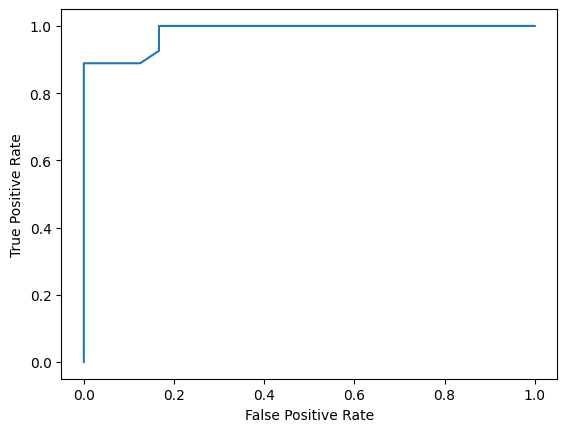

In [ ]:
y1_pred_proba = modelo1.predict_proba(X1_test_std)[::,1]
fpr1, tpr1, _1 = metrics.roc_curve(y1_test, y1_pred_proba)
#create ROC curve
plt.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

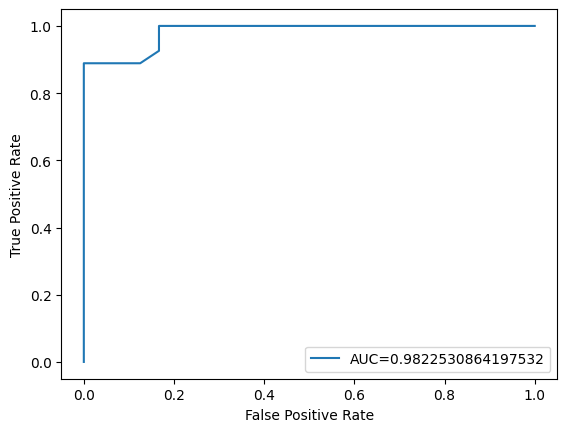

In [ ]:
y1_pred_proba = modelo1.predict_proba(X1_test_std)[::,1]
fpr1, tpr1, _1 = metrics.roc_curve(y1_test, y1_pred_proba)
auc = metrics.roc_auc_score(y1_test, y1_pred_proba)
#create ROC curve
plt.plot(fpr1,tpr1,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

* La curva es casi vertical cerca del origen, lo que indica una excelente capacidad del modelo para clasificar correctamente las instancias positivas y negativas cuando se utiliza un umbral de decisión alto.

* Luego, la curva se aplana gradualmente a medida que el umbral de decisión disminuye, lo que sugiere que el modelo comienza a confundir más instancias negativas como positivas.

* El valor de AUC proporcionado es de aproximadamente 0.9822, lo cual es muy cercano a 1. Esto indica un rendimiento casi perfecto del modelo de clasificación.

* Un valor de AUC de 1 representa un clasificador perfecto, mientras que un valor de 0.5 representa un clasificador aleatorio. Por lo tanto, un AUC de 0.9822 sugiere que el modelo tiene una capacidad excelente para distinguir entre las clases positivas y negativas.



---

# **CONCLUSIONES GENERALES**



* **Mejor Modelo**: El modelo con la base de datos ‘Binary Predictors’ mostró un rendimiento superior, con una precisión, sensibilidad y puntuación F1 de 0.96 y una exactitud del 96%. Mientras que la base de datos "Admittance" tiene una puntuación 0.89. Además, el área bajo la curva (AUC) de la curva ROC fue aproximadamente 0.9938, indicando una excelente capacidad de discriminación mientras que la otra base de datos el AUC fue de 0.9822.

* **Metricas de rendimeinto**: Este modelo fue más efectivo en clasificar correctamente las instancias positivas y negativas, con una tasa de verdaderos positivos (TPR) cercana a 1 y una tasa de falsos positivos (FPR) cerca de 0.

* MCC: El Coeficiente de Correlación de Matthews (MCC) del modelo es -0.0119, lo que sugiere un rendimiento cercano al de una clasificación aleatoria. Sin embargo, el MCC del modelo1 es 0.0722, indicando una correlación positiva débil.
